**PREDICTING PCOS IN CASES WITHOUT INFERTILITY**

**USING LOGISTIC REGRESSION**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Load the dataset
  # Update this path to the location of your file

file_path = r"C:\Users\manas\CODE\Python\Datasets\pcos\PCOS_data_without_infertility.xlsx"
data = pd.read_excel(file_path)

# Display basic information about the dataset
print(data.info())
print(data.head())

# Drop columns that are not needed for the analysis
data = data.drop(columns=['Patient File No.'],axis=1)

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Encode categorical features
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))  # Convert all to string for encoding
    label_encoders[column] = le

# Define features and target
X = data.drop('PCOS', axis=1)
y = data['PCOS']

# Handle missing values using imputation
imputer = SimpleImputer(strategy='mean') 
X = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient File No.        541 non-null    int64  
 1   PCOS                    541 non-null    int64  
 2    Age (yrs)              541 non-null    int64  
 3   Weight (Kg)             541 non-null    float64
 4   Height(Cm)              541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

**USING SVM**

In [3]:
from sklearn.svm import SVC

# Initialize and train the model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.8711656441717791
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       110
           1       0.86      0.72      0.78        53

    accuracy                           0.87       163
   macro avg       0.87      0.83      0.85       163
weighted avg       0.87      0.87      0.87       163



**USING RANDOM FOREST**

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.901840490797546
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       110
           1       0.89      0.79      0.84        53

    accuracy                           0.90       163
   macro avg       0.90      0.87      0.88       163
weighted avg       0.90      0.90      0.90       163



In [6]:
import matplotlib.pyplot as plt

In [9]:
yes=0
no=0
for item in y:
    if item==0:
        yes=yes+1
    else:
        no=no+1
yes


364

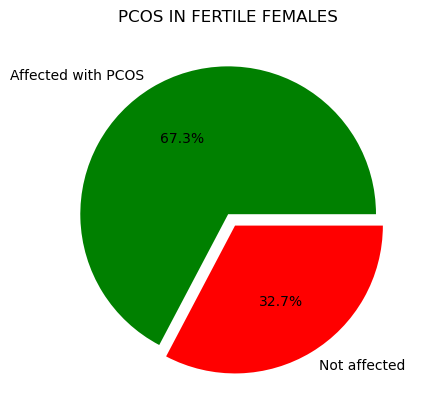

In [11]:
data=[yes,no]
labels=['Affected with PCOS','Not affected']
explo=[0,0.09]
plt.pie(data,labels=labels,autopct='%1.1f%%',colors=['green', 'red'],explode=explo)
plt.title('PCOS IN FERTILE FEMALES')
plt.show()

In [12]:
print(type(categorical_columns))

<class 'pandas.core.indexes.base.Index'>


In [17]:
print("label_encoders= ",label_encoders)

label_encoders=  {'II    beta-HCG(mIU/mL)': LabelEncoder(), 'AMH(ng/mL)': LabelEncoder(), 'Unnamed: 42': LabelEncoder()}


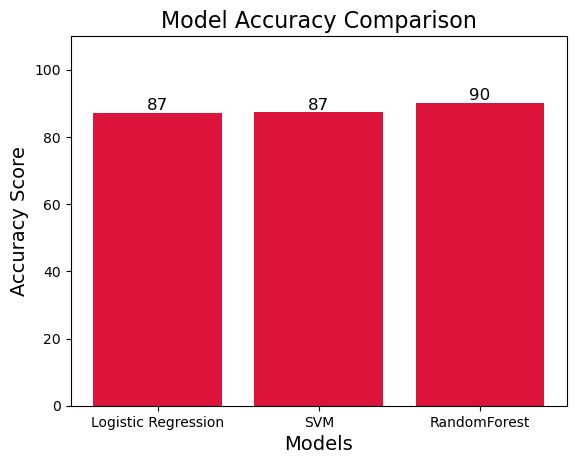

In [26]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression','SVM','RandomForest']

# Corresponding accuracy scores
accuracy_scores = [87.11,87.33,90.11]

# Create the bar chart

bars = plt.bar(models, accuracy_scores, color='crimson')

# Add accuracy score labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{int(yval)}', ha='center', va='bottom', fontsize=12)

# Set labels and title
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylim(0, 110)  # Set y-axis limit

# Display the plot
plt.show()
